In [1]:
%matplotlib inline
from sympy import *
init_session()

IPython console for SymPy 1.7.1 (Python 3.8.8-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.7.1/



# Quadratic finite impulse response predictor

In [2]:
var("a, b, c, x", real=True)

Samples -- from $s(0)$ to $s(n - 1)$ these are stored in the history buffer, $s(n)$ is the new predicted sample

In [3]:
s = Function("s", real=True)(x)
s

Function that we use for predicting

In [4]:
eq = Equality(s, a * x**2 + b * x + c)
eq

## Skipping samples

Number of samples in the history buffer:

In [5]:
n = 5

In [6]:
sample_eqs = [eq.subs(x, i * (n-1) // 2) for i in range(3)]
sample_eqs

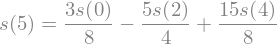

In [7]:
prediction_skipping = eq.subs(solve(sample_eqs, [a, b, c])).subs(x, n).simplify()
prediction_skipping

## Least squares
Number of samples in the history buffer:

In [8]:
n = 5

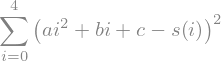

In [9]:
i = symbols("i")
error_eqs = Sum((eq.rhs - eq.lhs).subs(x, i)**2, (i, 0, n - 1))
error_eqs

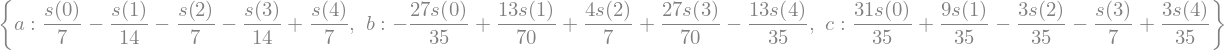

In [10]:
params = solve([error_eqs.diff(sym).doit().simplify() for sym in (a, b, c)], (a, b, c))
params

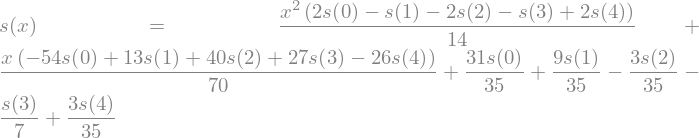

In [11]:
prediction_lstsq = eq.subs(params).simplify()
prediction_lstsq

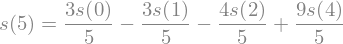

In [13]:
prediction_lstsq.subs(x, n)